**Задание 1**  
Импортируйте библиотеки pandas, numpy и matplotlib.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
Масштабируйте данные с помощью StandardScaler.  
Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

In [5]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [7]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [8]:
X_train_tsne.shape

(404, 2)

In [9]:
X_train_tsne[:3, :]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ]], dtype=float32)

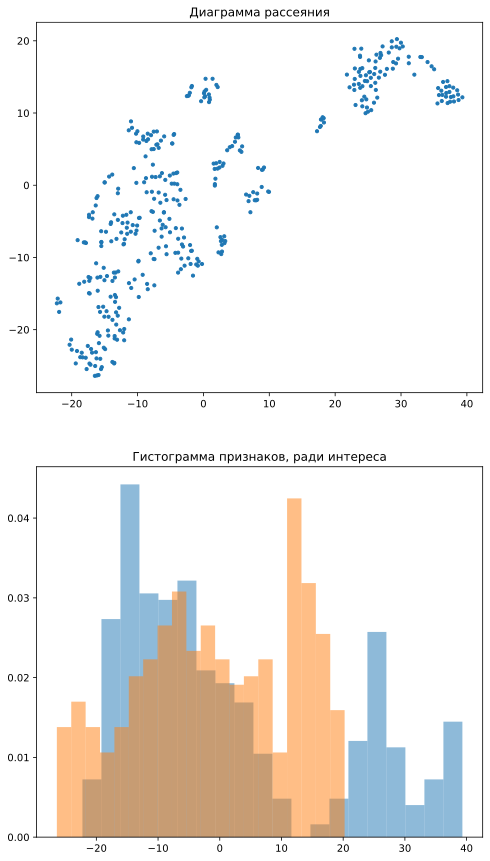

In [10]:
plt.rcParams['figure.figsize'] = 8, 15
ax = plt.subplot(2, 1, 1)
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=10)
ax.set_title('Диаграмма рассеяния')
ax = plt.subplot(2, 1, 2)
ax.hist(X_train_tsne[:, 0], bins=20, density=True, alpha=0.5)
ax.hist(X_train_tsne[:, 1], bins=20, density=True, alpha=0.5)
ax.set_title('Гистограмма признаков, ради интереса')
plt.show()

**Задание 2**  
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
from sklearn.cluster import KMeans

In [12]:
n_clusters = 3
model = KMeans(n_clusters=n_clusters, max_iter=100, random_state=42)

In [13]:
X_train_labels = model.fit_predict(X_train_scaled)

In [14]:
X_train_labels[:32]

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0], dtype=int32)

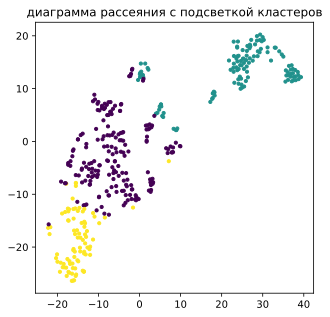

In [15]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels, s=10)
plt.title("диаграмма рассеяния с подсветкой кластеров")
plt.show()

In [16]:
X_train.loc[X_train_labels == 0, 'CRIM'].mean()

0.42166020942408367

In [17]:
for i in range(n_clusters):
    print(f'cluster - {i}, mean of PRICE = {np.mean(y_train[X_train_labels == i])}, \
mean of CRIM = {X_train.loc[X_train_labels == i, "CRIM"].mean()}')

cluster - 0, mean of PRICE = 24.958115183246072, mean of CRIM = 0.42166020942408367
cluster - 1, mean of PRICE = 16.165354330708663, mean of CRIM = 10.797028425196853
cluster - 2, mean of PRICE = 27.78837209302326, mean of CRIM = 0.07356558139534886


***Задание 3**  
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.  
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.  

In [18]:
X_test_labels = model.predict(X_test_scaled)

In [19]:
X_test_labels[:10]

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

In [20]:
for i in range(n_clusters):
    print(f'cluster - {i}, mean of PRICE = {np.mean(y_test[X_test_labels == i])}, \
mean of CRIM = {X_test.loc[X_test_labels == i, "CRIM"].mean()}')

cluster - 0, mean of PRICE = 21.860784313725492, mean of CRIM = 0.26607882352941176
cluster - 1, mean of PRICE = 16.43714285714286, mean of CRIM = 10.165531142857143
cluster - 2, mean of PRICE = 31.35, mean of CRIM = 0.062060000000000004
